#  Prophet # Planificación de escenarios a futuro post-confinamiento en Retail

Tenemos las ventas de todas las tiendas de una cadena de retail en una serie de categorías desde principios de 2018 hasta que acabó el confinamiento estricto y queremos hacer un análisis del impacto que ha tenido en las distintas categorías y plantear escenarios a futuro en caso de haber alguna vuelta al confinamiento.

Teniendo esta valiosa información, podríamos mejorar el *stockage* de los productos de las distintas categorías y poder reaccionar rápido en cuanto se anunciasen las nuevas medidas para poder amoldar espacios en los distintos almacenes de las tiendas y los pedidos en las distintas categorías en base a los distintos escenarios que podamos proponer.

In [40]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [41]:
# Configuro para ver todas las columnas
pd.set_option("display.max_columns", 64)

## 1. Cargar las ventas en un DataFrame

In [42]:
df_datos_categorias = pd.read_csv("Tabla Ventas Cats.csv", sep=";")
df_datos_categorias

Fecha              Categoría  Unidades  Ventas
0      2018-01-01          Aguas sin gas    14.000    7.00
1      2018-01-01   Cervezas con alcohol    68.000   45.66
2      2018-01-01                  Colas    24.000   26.14
3      2018-01-01   Utensilios de cocina    36.000    1.91
4      2018-01-01           Frutos secos    10.000   13.70
...           ...                    ...       ...     ...
14865  2020-05-31       Yogurt saludable     4.000    8.56
14866  2020-05-31        Papel higiénico     3.000    8.99
14867  2020-05-31                Patatas     2.000    7.18
14868  2020-05-31               Naranjas     9.475   25.25
14869  2020-05-31  Tabletas de chocolate     7.000    8.96

[14870 rows x 4 columns]

## 2. Exploración de los datos

**P. ¿ Cuál es el inicio y el final de datos ?**

In [43]:
print("Fecha de inicio:", df_datos_categorias['Fecha'].min())
print("Fecha de fin:", df_datos_categorias['Fecha'].max())

Fecha de inicio: 2018-01-01
Fecha de fin: 2020-05-31


**P ¿ De qué categorías tenemos venta ?**

In [44]:
categorias = df_datos_categorias['Categoría'].unique()
print("Categorías disponibles:")
for cat in sorted(categorias):
    print(f"- {cat}")

Categorías disponibles:
- Aguas sin gas
- Barras de pan baguette
- Barras de pan rústico
- Caldos y cremas líquidas
- Cervezas con alcohol
- Colas
- Frutos secos
- Huevos
- Leche
- Naranjas
- Papel higiénico
- Pasta
- Patatas
- Pizza congelada
- Tabletas de chocolate
- Utensilios de cocina
- Yogurt saludable


## 3. Visualización de categorías

Realiza algunas visualizaciones para poder ver la evolución de las ventas en el histórico de las diferentes categorías de producto.

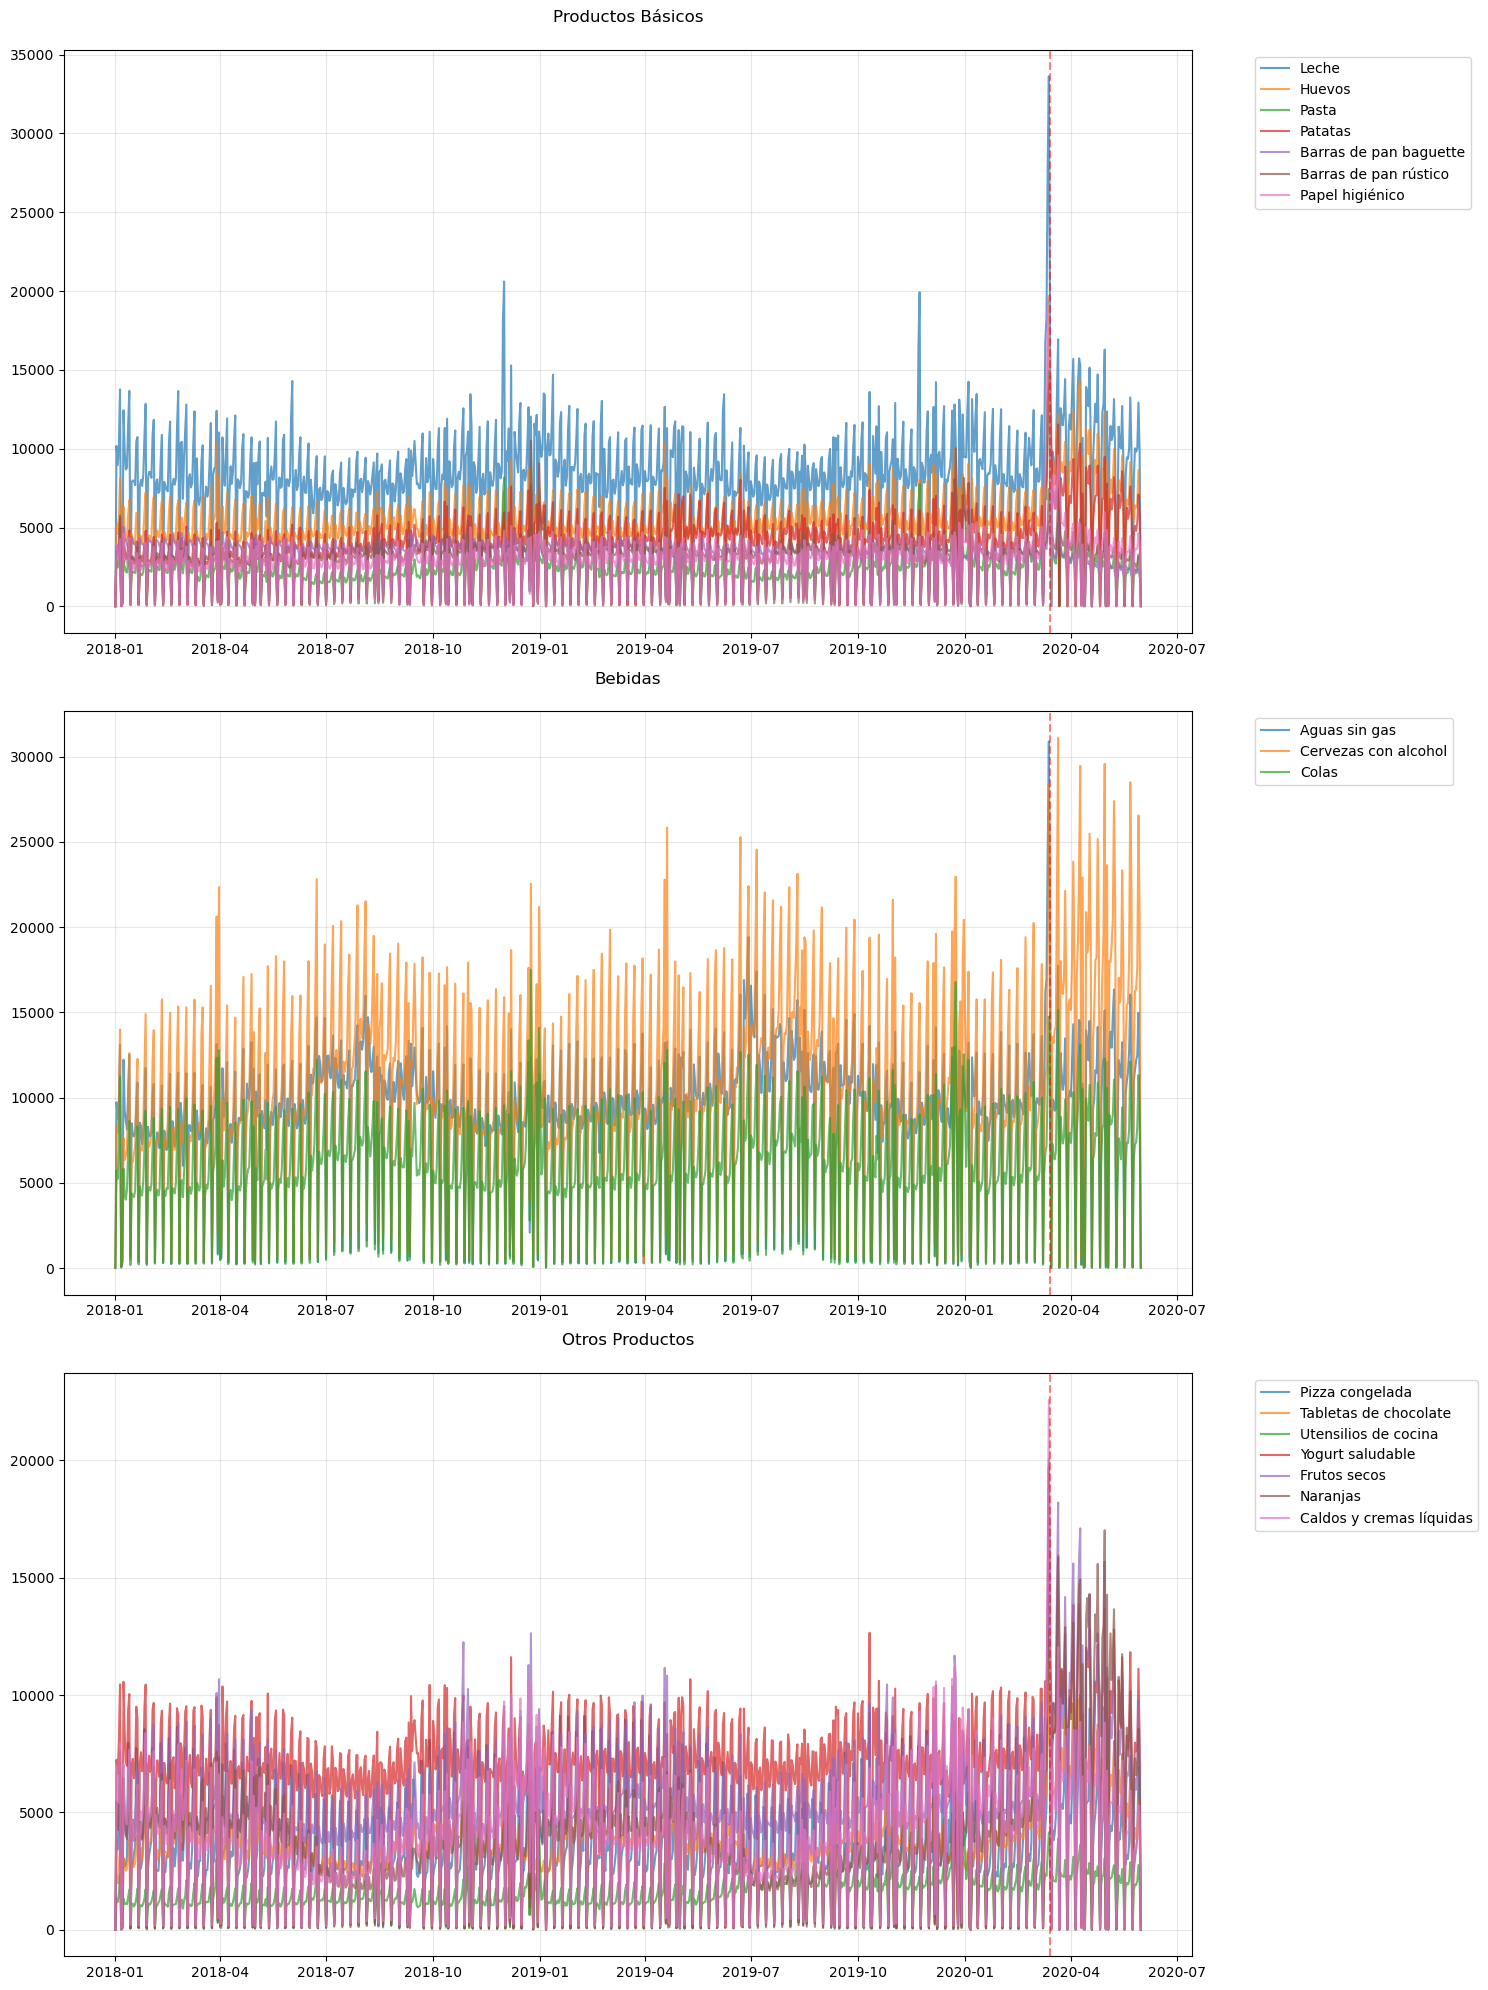

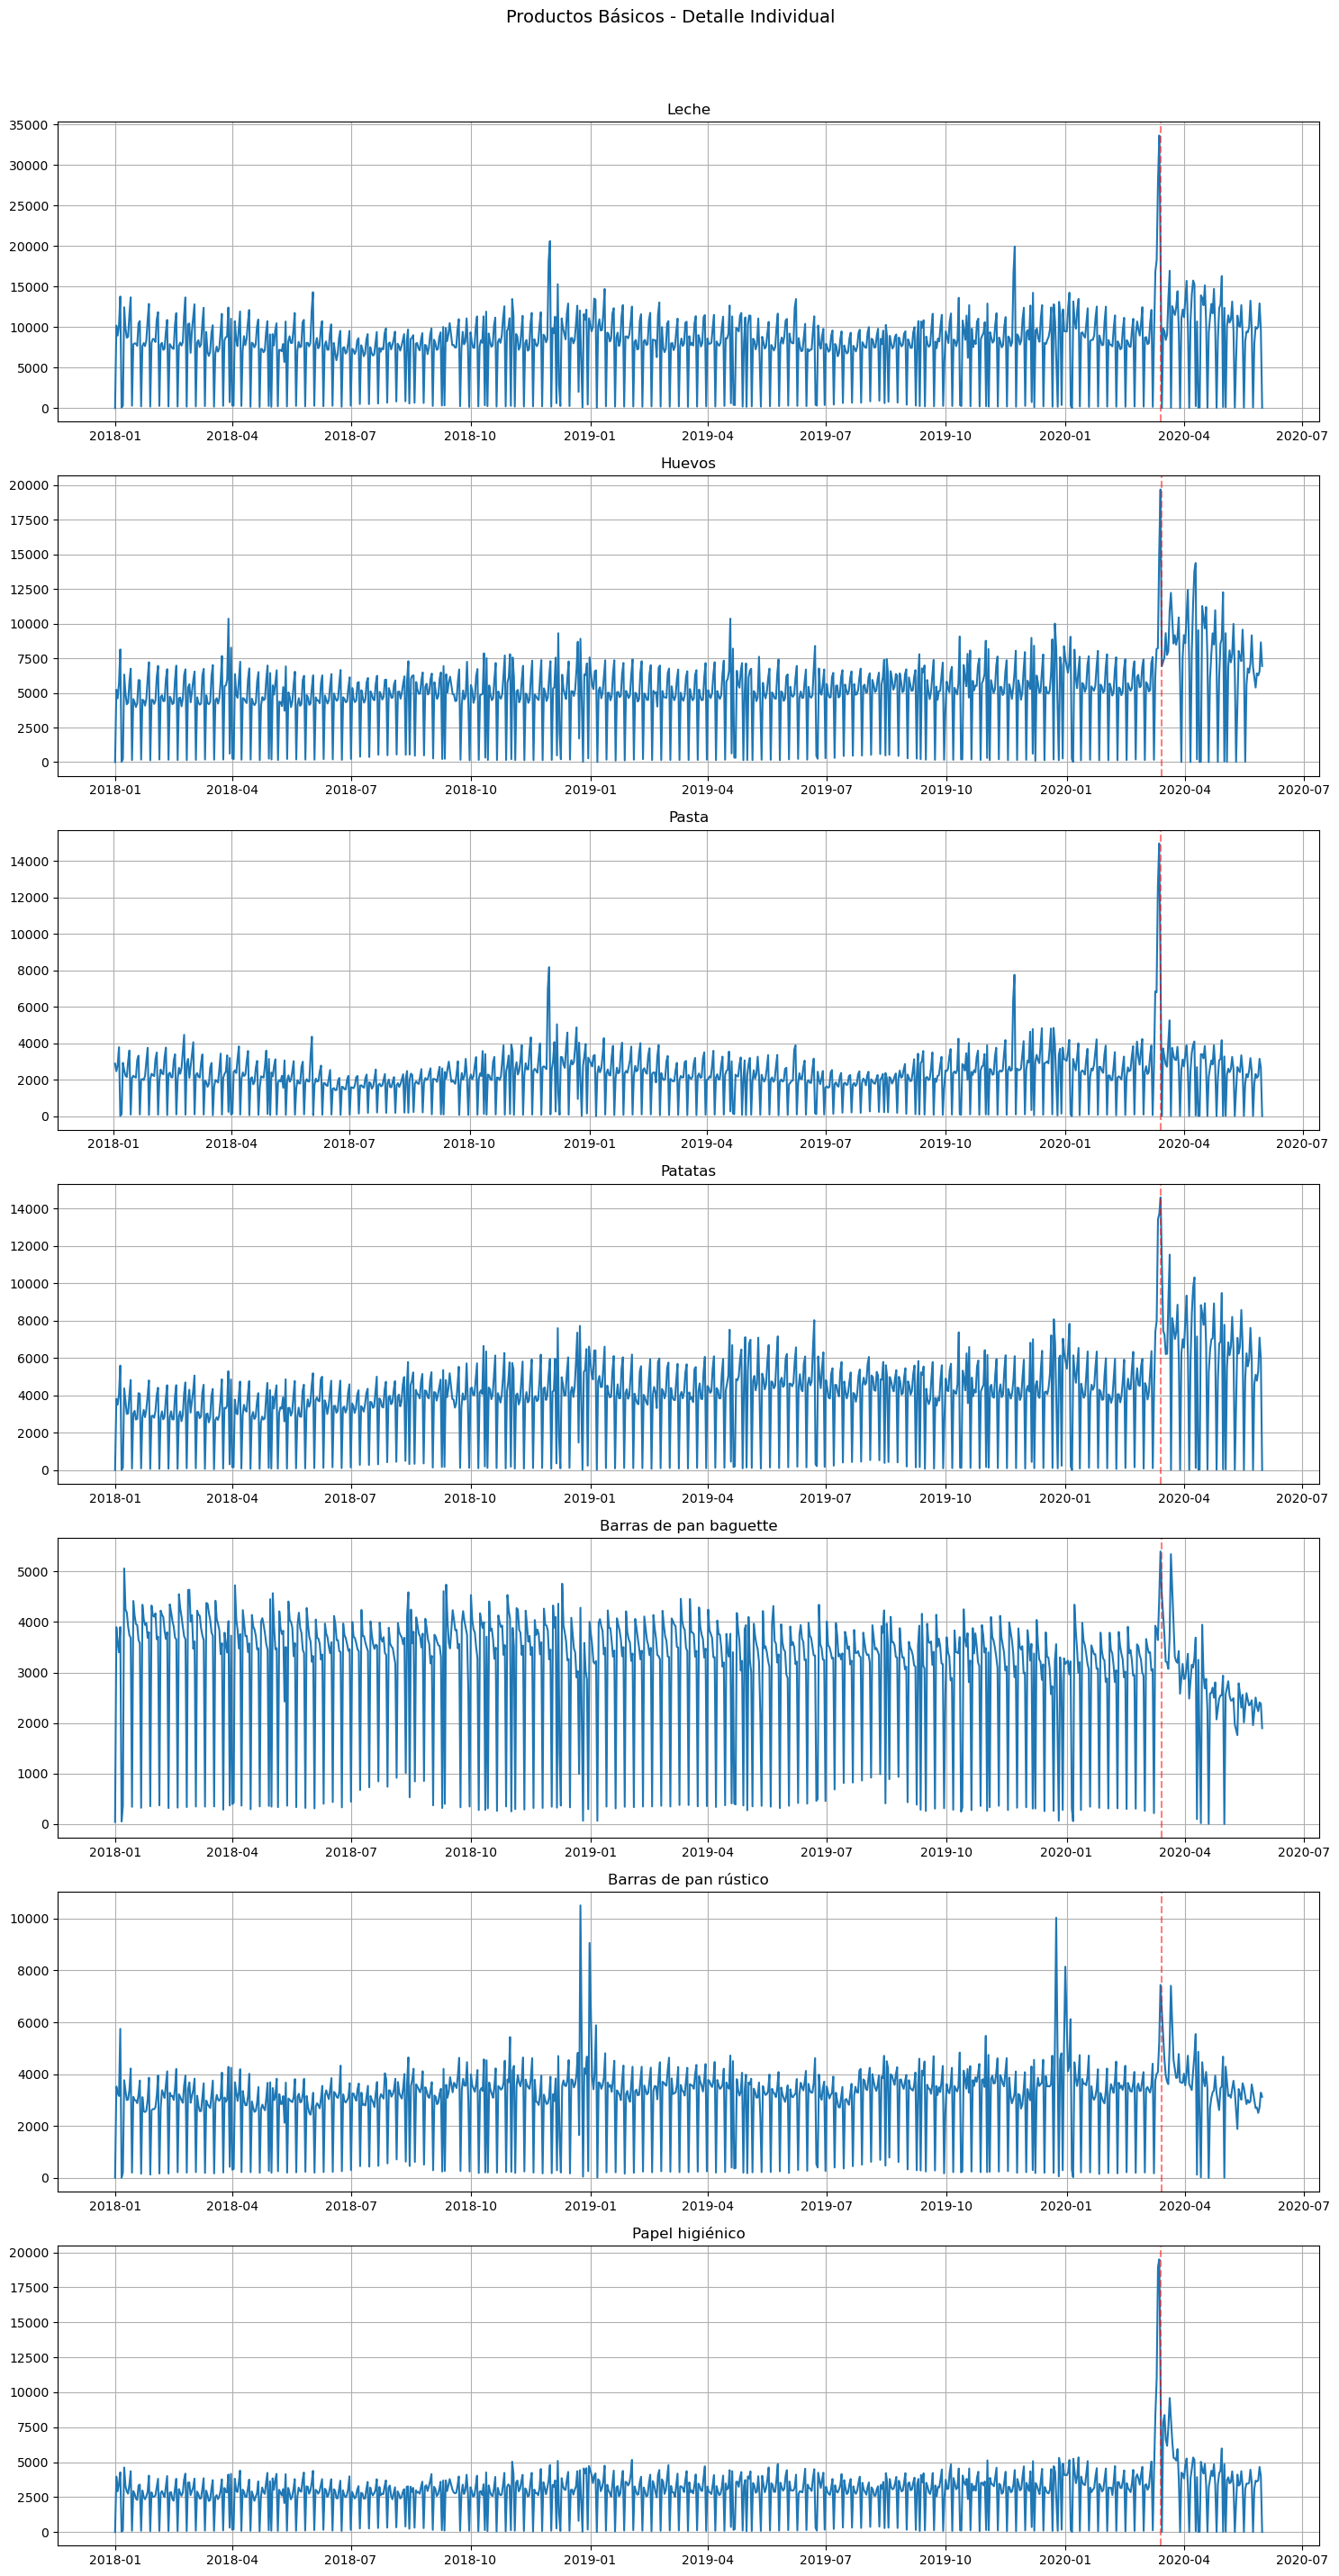

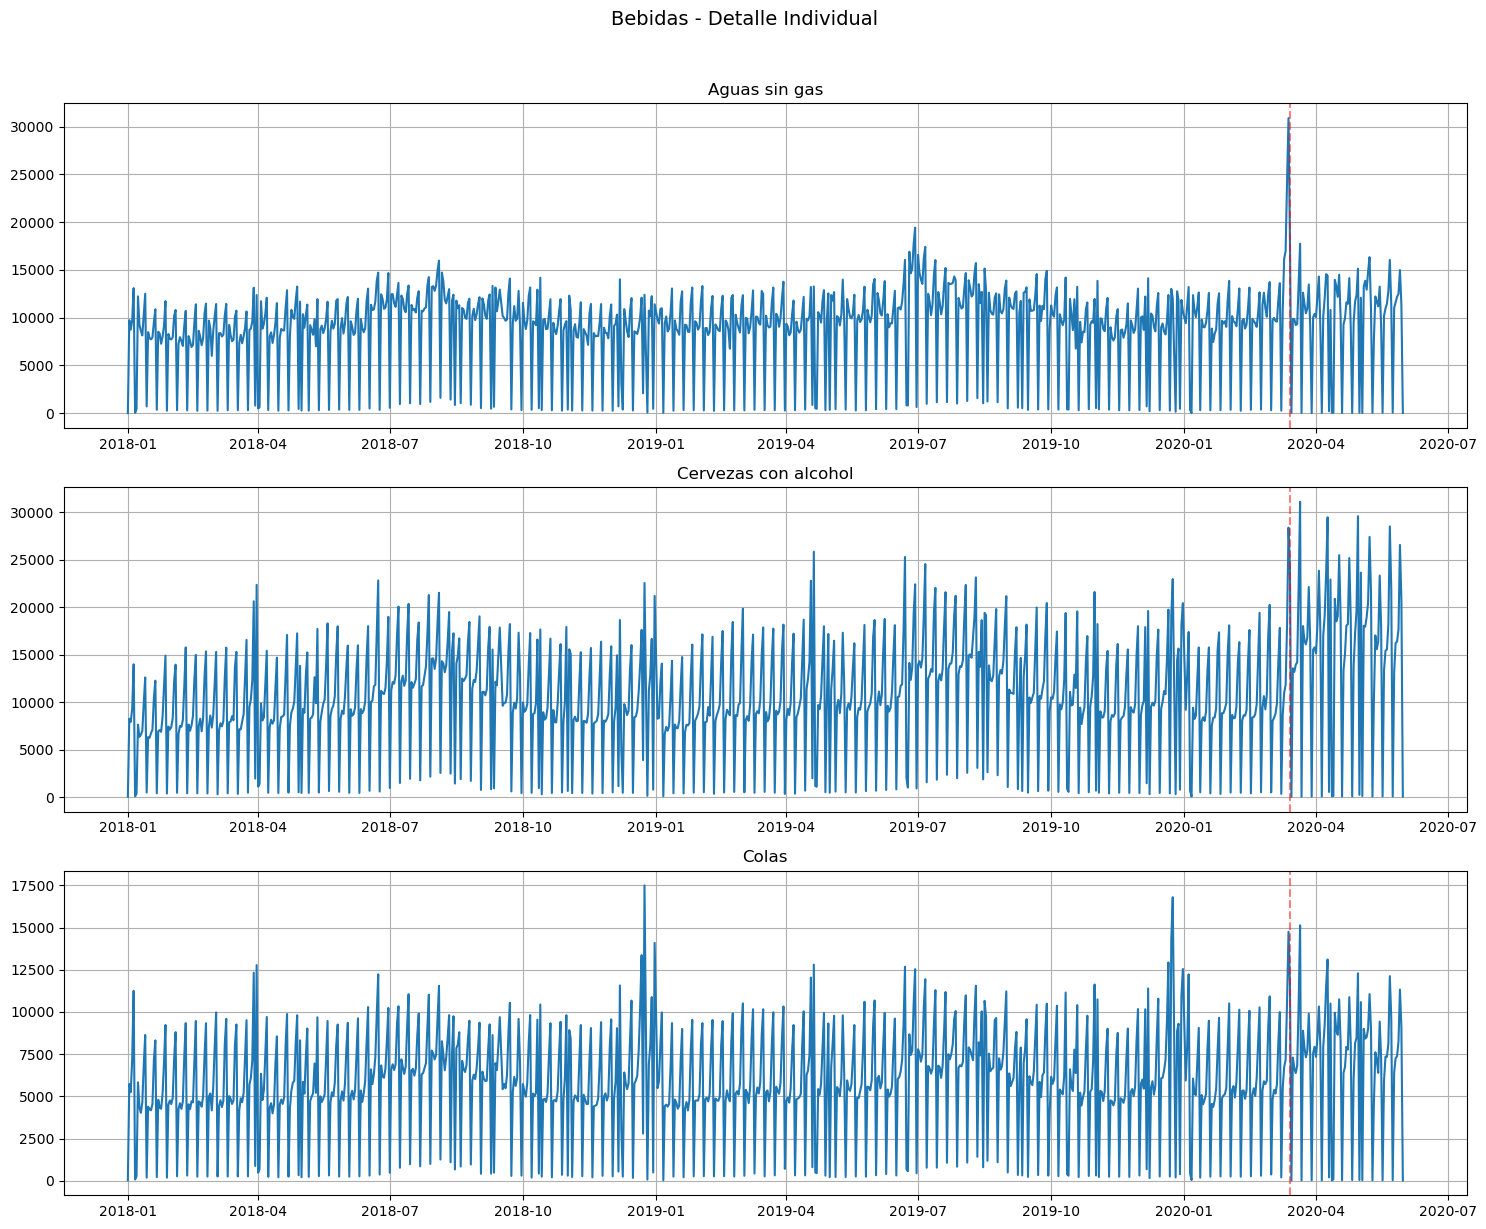

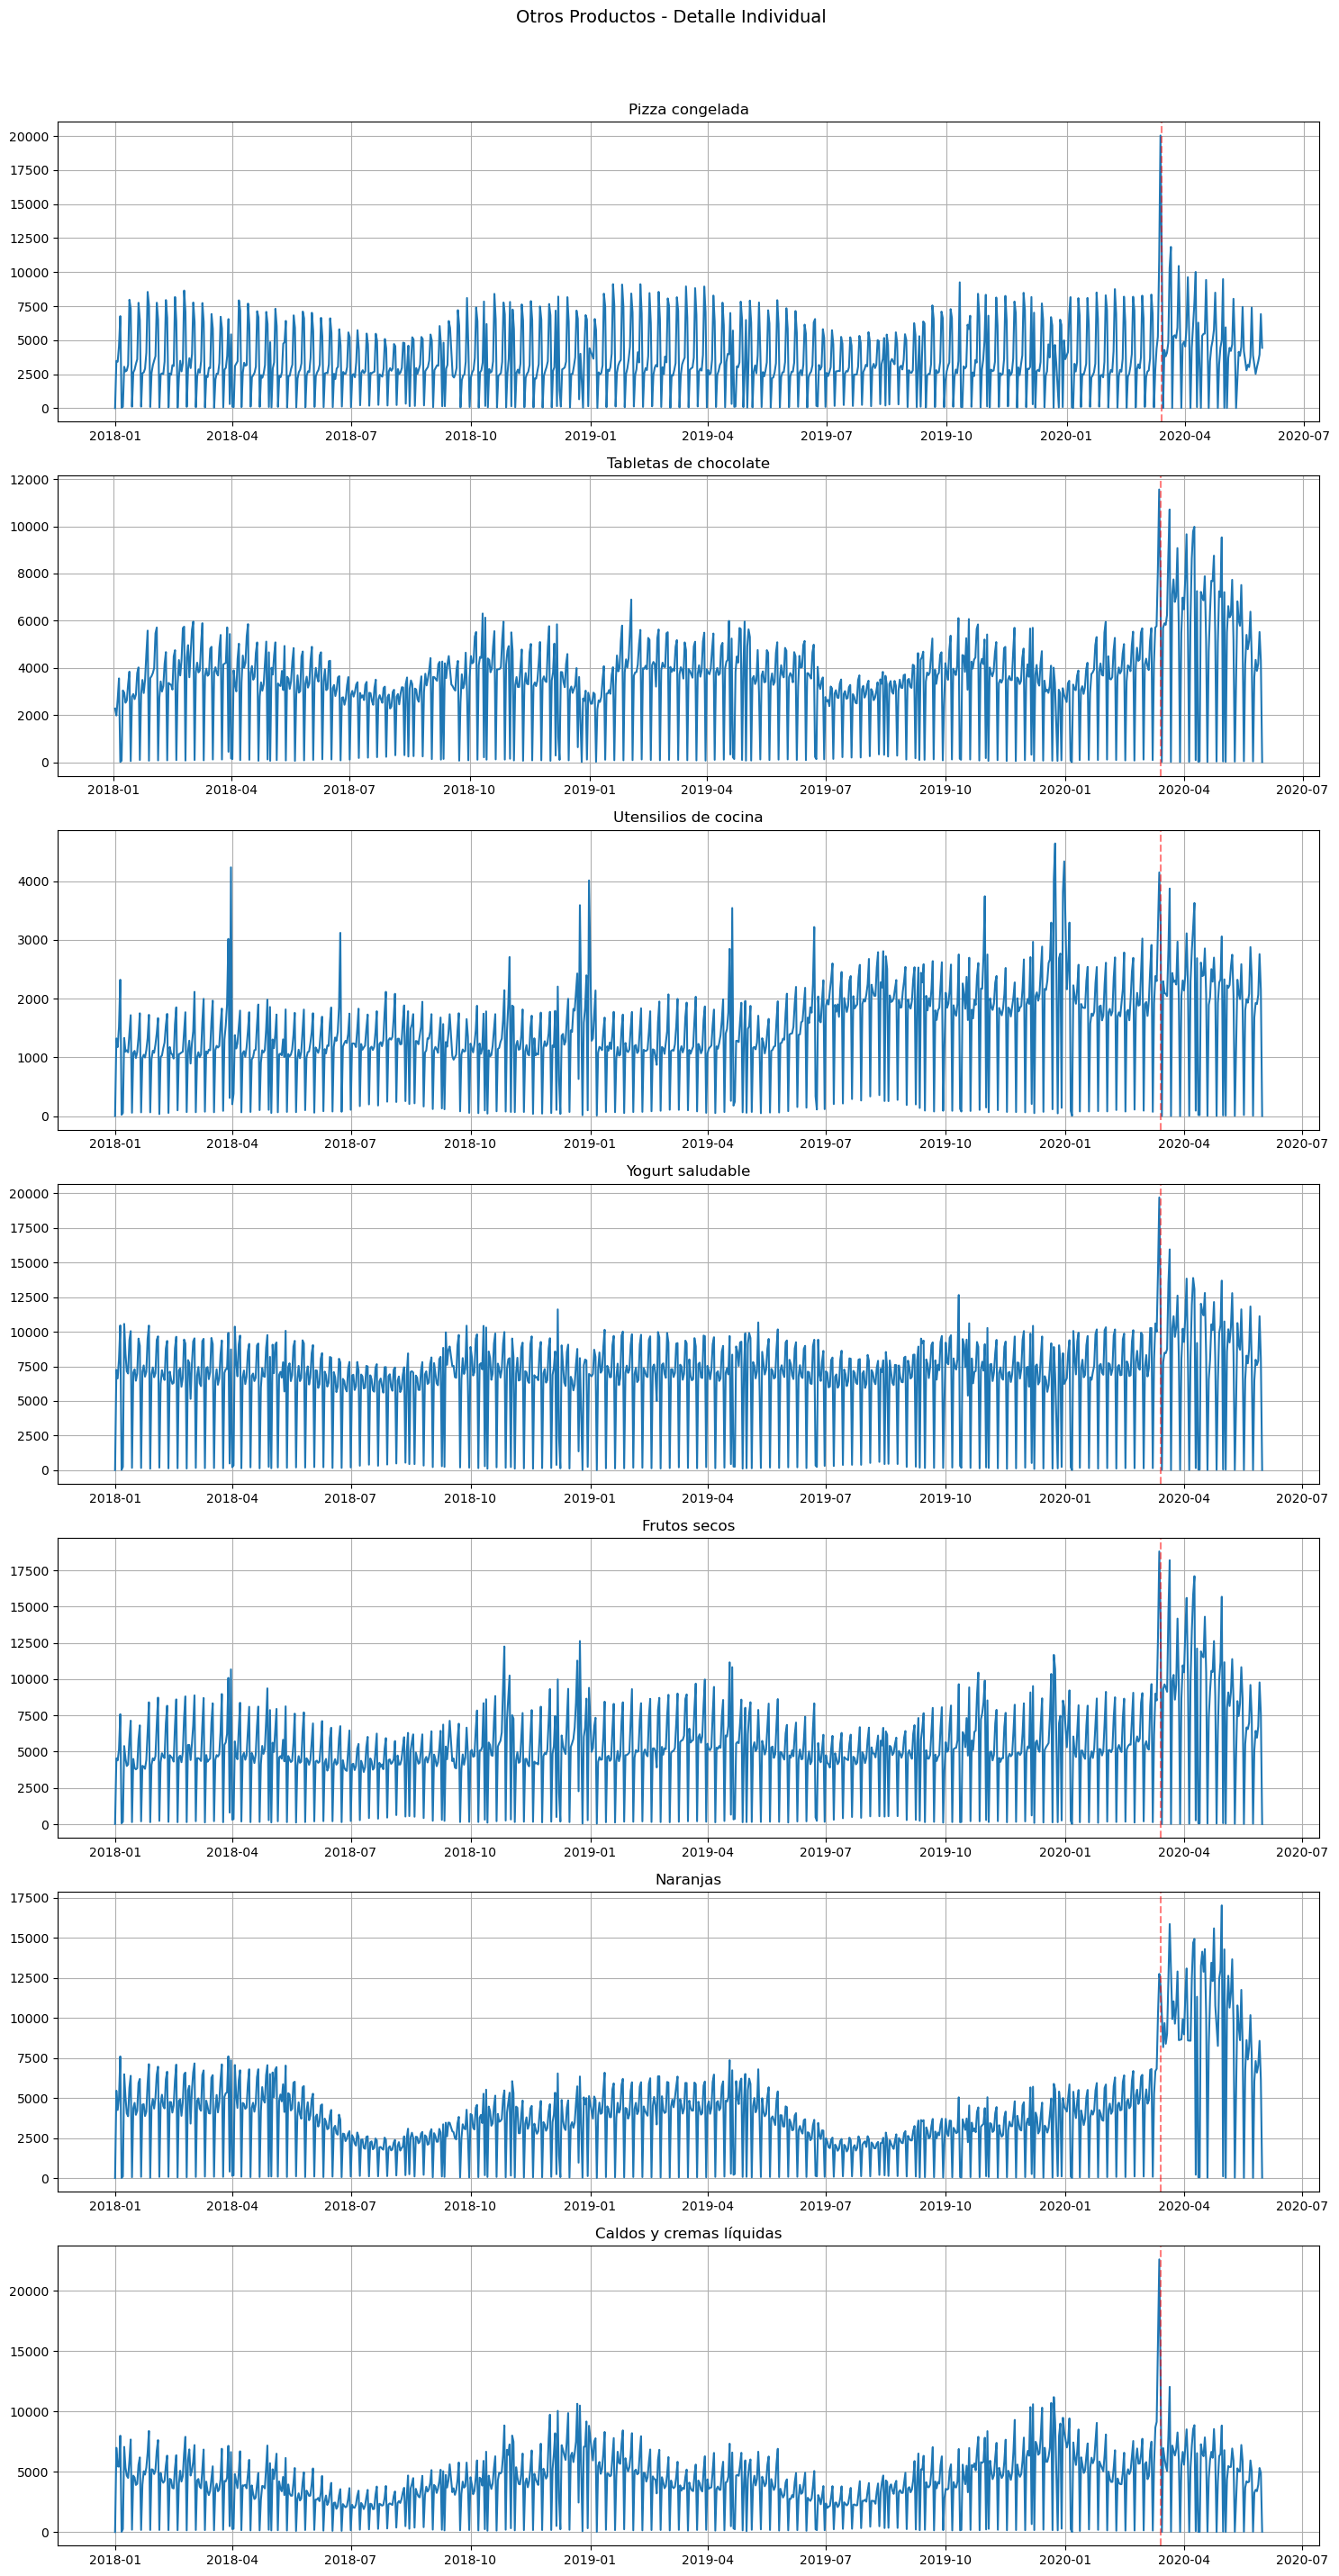

In [45]:
# Defino los grupos con los nombres correctos
productos_basicos = ['Leche', 'Huevos', 'Pasta', 'Patatas', 'Barras de pan baguette', 
                    'Barras de pan rústico', 'Papel higiénico']
bebidas = ['Aguas sin gas', 'Cervezas con alcohol', 'Colas']
otros = ['Pizza congelada', 'Tabletas de chocolate', 'Utensilios de cocina', 
         'Yogurt saludable', 'Frutos secos', 'Naranjas', 'Caldos y cremas líquidas']

# Aseguramos que la fecha esté en formato datetime
df_datos_categorias['Fecha'] = pd.to_datetime(df_datos_categorias['Fecha'])
fecha_confinamiento = pd.to_datetime('2020-03-14')

# 1. VISTA CONSOLIDADA POR GRUPOS
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

# Productos básicos consolidados
for producto in productos_basicos:
    datos = df_datos_categorias[df_datos_categorias['Categoría'] == producto].copy()
    datos = datos.groupby('Fecha')['Ventas'].sum().reset_index()  # Agregamos por día
    ax1.plot(datos['Fecha'], datos['Ventas'], label=producto, alpha=0.7)
ax1.set_title('Productos Básicos', fontsize=12, pad=20)
ax1.legend(bbox_to_anchor=(1.05, 1))
ax1.grid(True, alpha=0.3)
ax1.axvline(fecha_confinamiento, color='r', linestyle='--', alpha=0.5, label='Inicio confinamiento')

# Bebidas consolidadas
for bebida in bebidas:
    datos = df_datos_categorias[df_datos_categorias['Categoría'] == bebida].copy()
    datos = datos.groupby('Fecha')['Ventas'].sum().reset_index()  # Agregamos por día
    ax2.plot(datos['Fecha'], datos['Ventas'], label=bebida, alpha=0.7)
ax2.set_title('Bebidas', fontsize=12, pad=20)
ax2.legend(bbox_to_anchor=(1.05, 1))
ax2.grid(True, alpha=0.3)
ax2.axvline(fecha_confinamiento, color='r', linestyle='--', alpha=0.5, label='Inicio confinamiento')

# Otros productos consolidados
for otro in otros:
    datos = df_datos_categorias[df_datos_categorias['Categoría'] == otro].copy()
    datos = datos.groupby('Fecha')['Ventas'].sum().reset_index()  # Agregamos por día
    ax3.plot(datos['Fecha'], datos['Ventas'], label=otro, alpha=0.7)
ax3.set_title('Otros Productos', fontsize=12, pad=20)
ax3.legend(bbox_to_anchor=(1.05, 1))
ax3.grid(True, alpha=0.3)
ax3.axvline(fecha_confinamiento, color='r', linestyle='--', alpha=0.5, label='Inicio confinamiento')

plt.tight_layout()
plt.show()

# 2. VISTA INDIVIDUAL POR PRODUCTO EN CADA GRUPO
# Productos básicos individual
fig, axs = plt.subplots(len(productos_basicos), 1, figsize=(15, 4*len(productos_basicos)))
fig.suptitle('Productos Básicos - Detalle Individual', fontsize=14, y=1.02)
for idx, producto in enumerate(productos_basicos):
    datos = df_datos_categorias[df_datos_categorias['Categoría'] == producto].copy()
    datos = datos.groupby('Fecha')['Ventas'].sum().reset_index()  # Agregamos por día
    axs[idx].plot(datos['Fecha'], datos['Ventas'])
    axs[idx].set_title(producto)
    axs[idx].grid(True)
    axs[idx].axvline(fecha_confinamiento, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Bebidas individual
fig, axs = plt.subplots(len(bebidas), 1, figsize=(15, 4*len(bebidas)))
fig.suptitle('Bebidas - Detalle Individual', fontsize=14, y=1.02)
for idx, bebida in enumerate(bebidas):
    datos = df_datos_categorias[df_datos_categorias['Categoría'] == bebida].copy()
    datos = datos.groupby('Fecha')['Ventas'].sum().reset_index()  # Agregamos por día
    axs[idx].plot(datos['Fecha'], datos['Ventas'])
    axs[idx].set_title(bebida)
    axs[idx].grid(True)
    axs[idx].axvline(fecha_confinamiento, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Otros productos individual
fig, axs = plt.subplots(len(otros), 1, figsize=(15, 4*len(otros)))
fig.suptitle('Otros Productos - Detalle Individual', fontsize=14, y=1.02)
for idx, otro in enumerate(otros):
    datos = df_datos_categorias[df_datos_categorias['Categoría'] == otro].copy()
    datos = datos.groupby('Fecha')['Ventas'].sum().reset_index()  # Agregamos por día
    axs[idx].plot(datos['Fecha'], datos['Ventas'])
    axs[idx].set_title(otro)
    axs[idx].grid(True)
    axs[idx].axvline(fecha_confinamiento, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [46]:
# Análisis de las tendencias
print("""
Observaciones de ambas vistas:

1. Vista Consolidada:
   - Permite comparar niveles de ventas entre productos del mismo grupo
   - Facilita ver qué productos dominan en cada grupo
   - Muestra patrones de comportamiento similares entre productos

2. Vista Individual:
   - Permite analizar en detalle la evolución de cada producto
   - Muestra claramente la estacionalidad específica
   - Destaca mejor los eventos atípicos de cada producto

Patrones destacados:
- Productos básicos: Papel higiénico y leche muestran los mayores picos
- Bebidas: Clara dominancia de cervezas con alcohol
- Otros productos: Mayor variabilidad y comportamientos más diversos
""")



Observaciones de ambas vistas:

1. Vista Consolidada:
   - Permite comparar niveles de ventas entre productos del mismo grupo
   - Facilita ver qué productos dominan en cada grupo
   - Muestra patrones de comportamiento similares entre productos

2. Vista Individual:
   - Permite analizar en detalle la evolución de cada producto
   - Muestra claramente la estacionalidad específica
   - Destaca mejor los eventos atípicos de cada producto

Patrones destacados:
- Productos básicos: Papel higiénico y leche muestran los mayores picos
- Bebidas: Clara dominancia de cervezas con alcohol
- Otros productos: Mayor variabilidad y comportamientos más diversos



## 4. Realizar una previsión simple sobre las ventas en 2021

En este primer paso se trata de realizar una primera predicción de las ventas de una categoría en concreto hasta el final de 2021 (elige la que quieras). Vamos a ver como reacciona el modelo sin añadir ningún tipo de holiday para ver la interpretación del mismo cuando no le damos ningún otro tipo de input.

In [57]:
# 1. Veamos los datos originales
print("Muestra de datos originales:")
print(df_datos_categorias[df_datos_categorias['Categoría'] == 'Cervezas con alcohol'].head(10))

# 2. Preparo los datos para Prophet (sin sumar, solo formato correcto)
categoria = 'Cervezas con alcohol'
df_cerveza = df_datos_categorias[df_datos_categorias['Categoría'] == categoria].copy()
df_cerveza = df_cerveza[['Fecha', 'Ventas']].rename(columns={'Fecha': 'ds', 'Ventas': 'y'})
df_cerveza['ds'] = pd.to_datetime(df_cerveza['ds'])
print(df_cerveza.describe())
df_cerveza


Muestra de datos originales:
        Fecha             Categoría  Unidades        Ventas
1  2018-01-01  Cervezas con alcohol      68.0     45.660000
9  2018-01-02  Cervezas con alcohol    9254.0   8279.949863
18 2018-01-03  Cervezas con alcohol    9184.0   7933.099769
27 2018-01-04  Cervezas con alcohol   10758.0   9318.247636
36 2018-01-05  Cervezas con alcohol   15733.0  13993.164330
45 2018-01-06  Cervezas con alcohol     188.0    100.508600
54 2018-01-07  Cervezas con alcohol     480.0    382.077597
63 2018-01-08  Cervezas con alcohol    9879.0   7645.208414
72 2018-01-09  Cervezas con alcohol    7735.0   6361.039531
81 2018-01-10  Cervezas con alcohol    8366.0   6576.024435
                                  ds             y
count                            877    877.000000
mean   2019-03-17 05:39:53.158494976  10773.756018
min              2018-01-01 00:00:00     44.250001
25%              2018-08-08 00:00:00   8028.339929
50%              2019-03-18 00:00:00  10256.280009
75%  

ds             y
1    2018-01-01     45.660000
9    2018-01-02   8279.949863
18   2018-01-03   7933.099769
27   2018-01-04   9318.247636
36   2018-01-05  13993.164330
...         ...           ...
7842 2020-05-27  16368.739892
7851 2020-05-28  17653.629882
7860 2020-05-29  26554.599814
7869 2020-05-30  20740.349842
7878 2020-05-31     74.430000

[877 rows x 2 columns]

In [58]:
#2.1 Calculo el número de días hasta fin de 2021
ultimo_dato = df_cerveza['ds'].max()
fin_2021 = pd.to_datetime('2021-12-31')
dias_prediccion = (fin_2021 - ultimo_dato).days

print(f"Último dato disponible: {ultimo_dato.strftime('%Y-%m-%d')}")
print(f"Días a predecir: {dias_prediccion}")

# 3. Creo y entreno el modelo
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

m.fit(df_cerveza)

# 4. Genero predicciones hasta fin de 2021
future = m.make_future_dataframe(periods=dias_prediccion)
forecast = m.predict(future)
forecast

23:38:09 - cmdstanpy - INFO - Chain [1] start processing


Último dato disponible: 2020-05-31
Días a predecir: 579


23:38:09 - cmdstanpy - INFO - Chain [1] done processing


ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2018-01-01   9238.982806   3744.707006  11585.187584   9238.982806   
1    2018-01-02   9242.083734   4309.173136  11618.488347   9242.083734   
2    2018-01-03   9245.184663   3741.650608  11437.184136   9245.184663   
3    2018-01-04   9248.285591   4480.301862  12476.246175   9248.285591   
4    2018-01-05   9251.386520   6993.810547  14551.594317   9251.386520   
...         ...           ...           ...           ...           ...   
1451 2021-12-27  25786.608505  18512.093735  27296.713168  24291.718105   
1452 2021-12-28  25805.244547  20023.816637  28319.674462  24306.463513   
1453 2021-12-29  25823.880588  19203.276188  27578.542564  24321.106233   
1454 2021-12-30  25842.516629  21521.903895  29760.529164  24336.999227   
1455 2021-12-31  25861.152671  28431.679677  37322.905552  24353.304400   

       trend_upper  multiplicative_terms  multiplicative_terms_lower  \
0      9238.982806             -0.188516                   -0.188516   
1      9242.083734             -0.140498                   -0.140498   
2      9245.184663             -0.178655                   -0.178655   
3      9248.285591             -0.088957                   -0.088957   
4      9251.386520              0.189976                    0.189976   
...            ...                   ...                         ...   
1451  27357.029529             -0.117280                   -0.117280   
1452  27378.548257             -0.064076                   -0.064076   
1453  27401.429723             -0.098216                   -0.098216   
1454  27424.566473             -0.005753                   -0.005753   
1455  27447.703223              0.274633                    0.274633   

      multiplicative_terms_upper    weekly  weekly_lower  weekly_upper  \
0                      -0.188516 -0.081591     -0.081591     -0.081591   
1                      -0.140498 -0.016666     -0.016666     -0.016666   
2                      -0.178655 -0.037618     -0.037618     -0.037618   
3                      -0.088957  0.069307      0.069307      0.069307   
4                       0.189976  0.365215      0.365215      0.365215   
...                          ...       ...           ...           ...   
1451                   -0.117280 -0.081591     -0.081591     -0.081591   
1452                   -0.064076 -0.016666     -0.016666     -0.016666   
1453                   -0.098216 -0.037618     -0.037618     -0.037618   
1454                   -0.005753  0.069307      0.069307      0.069307   
1455                    0.274633  0.365215      0.365215      0.365215   

        yearly  yearly_lower  yearly_upper  additive_terms  \
0    -0.106924     -0.106924     -0.106924             0.0   
1    -0.123832     -0.123832     -0.123832             0.0   
2    -0.141036     -0.141036     -0.141036             0.0   
3    -0.158264     -0.158264     -0.158264             0.0   
4    -0.175239     -0.175239     -0.175239             0.0   
...        ...           ...           ...             ...   
1451 -0.035689     -0.035689     -0.035689             0.0   
1452 -0.047410     -0.047410     -0.047410             0.0   
1453 -0.060597     -0.060597     -0.060597             0.0   
1454 -0.075060     -0.075060     -0.075060             0.0   
1455 -0.090582     -0.090582     -0.090582             0.0   

      additive_terms_lower  additive_terms_upper          yhat  
0                      0.0                   0.0   7497.288944  
1                      0.0                   0.0   7943.593289  
2                      0.0                   0.0   7593.488624  
3                      0.0                   0.0   8425.584363  
4                      0.0                   0.0  11008.927192  
...                    ...                   ...           ...  
1451                   0.0                   0.0  22762.359500  
1452                   0.0                   0.0  24151.754886  
1453                   0.0  

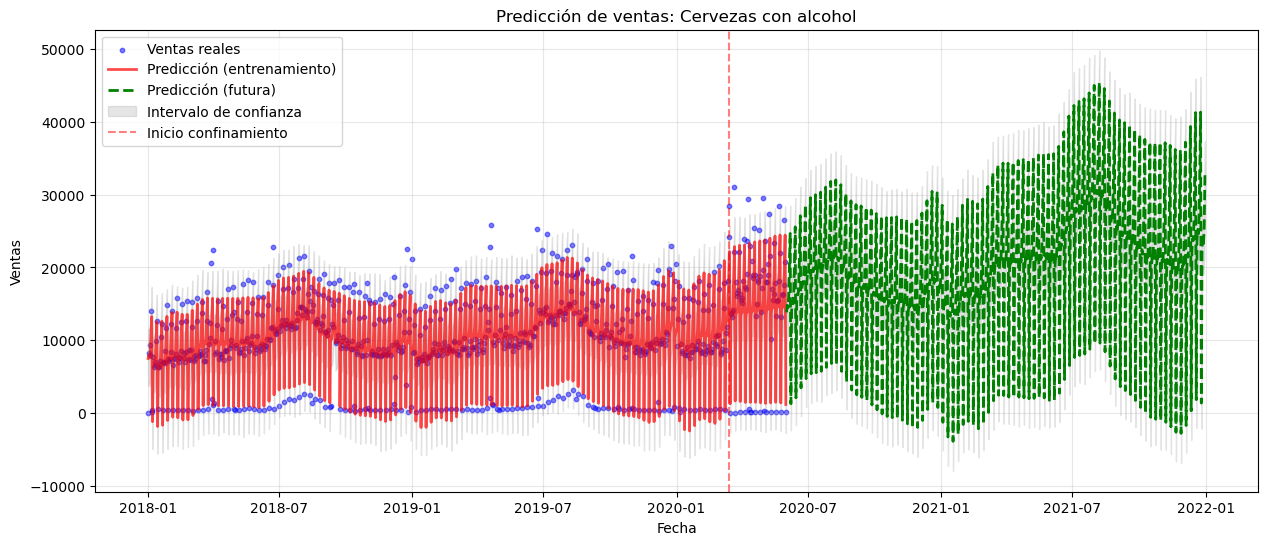

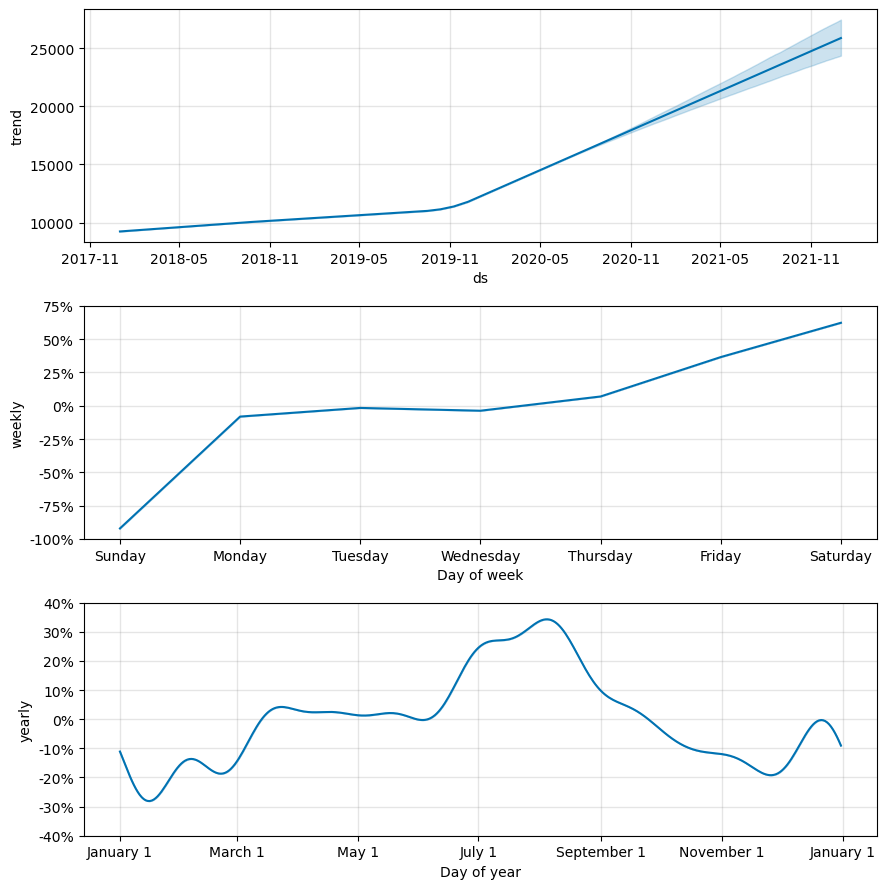

In [59]:
# 5. Visualización de la predicción
plt.figure(figsize=(15, 6))

# Datos reales
plt.scatter(df_cerveza['ds'], df_cerveza['y'], 
           color='blue', alpha=0.5, s=10, label='Ventas reales')

# Predicción hasta el último dato real
mask_training = forecast['ds'] <= df_cerveza['ds'].max()
plt.plot(forecast['ds'][mask_training], 
         forecast['yhat'][mask_training], 
         color='red', alpha=0.7, linewidth=2, 
         label='Predicción (entrenamiento)')

# Predicción futura (hasta fin 2021)
mask_future = forecast['ds'] > df_cerveza['ds'].max()
plt.plot(forecast['ds'][mask_future], 
         forecast['yhat'][mask_future], 
         'g--', linewidth=2, 
         label='Predicción (futura)')

# Intervalo de confianza
plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='gray', alpha=0.2,
                 label='Intervalo de confianza')

plt.title('Predicción de ventas: Cervezas con alcohol')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True, alpha=0.3)
plt.axvline(x=pd.to_datetime('2020-03-14'), 
            color='r', linestyle='--', alpha=0.5,
            label='Inicio confinamiento')
plt.legend()
plt.show()

# 6. Visualización de componentes
m.plot_components(forecast)
plt.show()

# 7. Métricas y análisis
df_metrics = pd.DataFrame({
    'y_true': df_cerveza['y'],
    'y_pred': forecast['yhat'][:len(df_cerveza)]
})

mape = np.mean(np.abs((df_metrics['y_true'] - df_metrics['y_pred']) / df_metrics['y_true'])) * 100
rmse = np.sqrt(np.mean((df_metrics['y_true'] - df_metrics['y_pred'])**2))


**P ¿ Están bien nuestras predicciones ?** Fíjate en la estacionalidad anual donde presenta un pico. ¿Ha habido alguna influencia puntual que haya podido influenciar en este cálculo?

In [28]:
print("""
No, las predicciones no son adecuadas creo que por las siguientes razones:

1. Estacionalidad distorsionada:
   - Normalmente, las cervezas muestran picos estacionales en verano (visible en 2018 y 2019)
   - Sin embargo, el pico más alto aparece en marzo 2020 debido al confinamiento
   - El modelo interpreta erróneamente este pico como parte del patrón estacional

2. Influencia puntual del COVID-19:
   - El confinamiento (marzo 2020) generó un comportamiento atípico en las ventas
   - Este evento extraordinario ha influido significativamente en el cálculo porque:
     * Genera el pico más alto de la serie
     * Rompe el patrón estacional normal
     * No representa un comportamiento cíclico o estacional real

3. Consecuencias en la predicción:
   - Sobreestimación de valores futuros
   - Intervalos de confianza demasiado amplios
   - Posibilidad de valores negativos en el límite inferior del intervalo

Para mejorar el modelo, necesitamos tratar el confinamiento como un evento especial (holiday) 
y no como parte del patrón estacional normal.
""")


No, las predicciones no son adecuadas creo que por las siguientes razones:

1. Estacionalidad distorsionada:
   - Normalmente, las cervezas muestran picos estacionales en verano (visible en 2018 y 2019)
   - Sin embargo, el pico más alto aparece en marzo 2020 debido al confinamiento
   - El modelo interpreta erróneamente este pico como parte del patrón estacional

2. Influencia puntual del COVID-19:
   - El confinamiento (marzo 2020) generó un comportamiento atípico en las ventas
   - Este evento extraordinario ha influido significativamente en el cálculo porque:
     * Genera el pico más alto de la serie
     * Rompe el patrón estacional normal
     * No representa un comportamiento cíclico o estacional real

3. Consecuencias en la predicción:
   - Sobreestimación de valores futuros
   - Intervalos de confianza demasiado amplios
   - Posibilidad de valores negativos en el límite inferior del intervalo

Para mejorar el modelo, necesitamos tratar el confinamiento como un evento especia

## 5. Mejorar nuestro modelo de previsión incluyendo algún evento especial.

Incluye una lista de holidays que sea interesante con sus distintos tags para que el modelo separe mejor qué contribuciones vienen por la propia estacionalidad, y cuáles por eventos externos.

A modo de ejemplo, podrías modelizar el efecto del confinamiento por el COVID durante los meses correspondientes de 2020, pero también puedes meter cualquier otra fecha especial que se te ocurra y creas que pueda tener interés.


Compara las predicciones y componentes de este modelo con el modelo sin fechas especiales del apartado anterior.

In [61]:
# 1. Defino los eventos especiales hasta fin de 2021
holidays = pd.DataFrame([
    # Eventos COVID 2020
    {
        'holiday': 'Confinamiento_Inicial',
        'ds': '2020-03-14',
        'lower_window': 0,
        'upper_window': 15,
        'description': 'Primer confinamiento COVID'
    },
    {
        'holiday': 'Fase_0',
        'ds': '2020-03-29',
        'lower_window': 0,
        'upper_window': 15,
        'description': 'Adaptación inicial'
    },
    {
        'holiday': 'Fase_1',
        'ds': '2020-04-13',
        'lower_window': 0,
        'upper_window': 15,
        'description': 'Primera fase desescalada'
    },
    # Eventos estacionales 2020-2021
    {
        'holiday': 'Verano_2020',
        'ds': '2020-06-21',
        'lower_window': -10,
        'upper_window': 60,
        'description': 'Temporada alta cerveza 2020'
    },
    {
        'holiday': 'Navidad_2020',
        'ds': '2020-12-24',
        'lower_window': -7,
        'upper_window': 7,
        'description': 'Temporada navideña 2020'
    },
    {
        'holiday': 'Verano_2021',
        'ds': '2021-06-21',
        'lower_window': -10,
        'upper_window': 60,
        'description': 'Temporada alta cerveza 2021'
    },
    {
        'holiday': 'Navidad_2021',
        'ds': '2021-12-24',
        'lower_window': -7,
        'upper_window': 7,
        'description': 'Temporada navideña 2021'
    }
])
holidays

holiday          ds  lower_window  upper_window  \
0  Confinamiento_Inicial  2020-03-14             0            15   
1                 Fase_0  2020-03-29             0            15   
2                 Fase_1  2020-04-13             0            15   
3            Verano_2020  2020-06-21           -10            60   
4           Navidad_2020  2020-12-24            -7             7   
5            Verano_2021  2021-06-21           -10            60   
6           Navidad_2021  2021-12-24            -7             7   

                   description  
0   Primer confinamiento COVID  
1           Adaptación inicial  
2     Primera fase desescalada  
3  Temporada alta cerveza 2020  
4      Temporada navideña 2020  
5  Temporada alta cerveza 2021  
6      Temporada navideña 2021

In [63]:
# 2. Creo el modelo con eventos especiales
m_holidays = Prophet(
    holidays=holidays,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05,
    holidays_prior_scale=10  # Doy más peso a los eventos especiales
)

# 3. Entreno el modelo
m_holidays.fit(df_cerveza)

# 4. Genero predicciones hasta fin de 2021
ultimo_dato = df_cerveza['ds'].max()
fin_2021 = pd.to_datetime('2021-12-31')
dias_prediccion = (fin_2021 - ultimo_dato).days

future = m_holidays.make_future_dataframe(periods=dias_prediccion)
forecast = m_holidays.predict(future)
forecast

23:53:25 - cmdstanpy - INFO - Chain [1] start processing
23:53:25 - cmdstanpy - INFO - Chain [1] done processing


ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2018-01-01   9243.771825   4135.365608  11194.235863   9243.771825   
1    2018-01-02   9247.004842   4448.599914  11387.489748   9247.004842   
2    2018-01-03   9250.237860   3832.060333  10939.407762   9250.237860   
3    2018-01-04   9253.470877   5113.463146  11934.296039   9253.470877   
4    2018-01-05   9256.703894   7466.639810  14933.660916   9256.703894   
...         ...           ...           ...           ...           ...   
1451 2021-12-27  26289.979379  20133.124752  28132.484566  24779.824329   
1452 2021-12-28  26309.787328  20862.962237  28555.896299  24792.306640   
1453 2021-12-29  26329.595277  19772.132765  27508.456726  24807.910129   
1454 2021-12-30  26349.403226  22245.336091  30038.269889  24824.784168   
1455 2021-12-31  26369.211175  30000.790216  38738.253365  24841.658207   

       trend_upper  Confinamiento_Inicial  Confinamiento_Inicial_lower  \
0      9243.771825                    0.0                          0.0   
1      9247.004842                    0.0                          0.0   
2      9250.237860                    0.0                          0.0   
3      9253.470877                    0.0                          0.0   
4      9256.703894                    0.0                          0.0   
...            ...                    ...                          ...   
1451  28225.397629                    0.0                          0.0   
1452  28250.650124                    0.0                          0.0   
1453  28275.902619                    0.0                          0.0   
1454  28300.748894                    0.0                          0.0   
1455  28324.430437                    0.0                          0.0   

      Confinamiento_Inicial_upper  Fase_0  Fase_0_lower  Fase_0_upper  Fase_1  \
0                             0.0     0.0           0.0           0.0     0.0   
1                             0.0     0.0           0.0           0.0     0.0   
2                             0.0     0.0           0.0           0.0     0.0   
3                             0.0     0.0           0.0           0.0     0.0   
4                             0.0     0.0           0.0           0.0     0.0   
...                           ...     ...           ...           ...     ...   
1451                          0.0     0.0           0.0           0.0     0.0   
1452                          0.0     0.0           0.0           0.0     0.0   
1453                          0.0     0.0           0.0           0.0     0.0   
1454                          0.0     0.0           0.0           0.0     0.0   
1455                          0.0     0.0           0.0           0.0     0.0   

      Fase_1_lower  Fase_1_upper  Navidad_2020  Navidad_2020_lower  \
0              0.0           0.0           0.0                 0.0   
1              0.0           0.0           0.0                 0.0   
2              0.0           0.0           0.0                 0.0   
3              0.0           0.0           0.0                 0.0   
4              0.0           0.0           0.0                 0.0   
...            ...           ...           ...                 ...   
1451           0.0           0.0           0.0                 0.0   
1452           0.0           0.0           0.0                 0.0   
1453           0.0           0.0           0.0                 0.0   
1454           0.0           0.0           0.0                 0.0   
1455           0.0           0.0           0.0                 0.0   

      Navidad_2020_upper  Navidad_2021  Navidad_2021_lower  \
0                    0.0           0.0                 0.0   
1                    0.0           0.0                 0.0   
2                    0.0           0.0                 0.0   
3                    0.0           0.0                 0.0   
4                    0.0           0.0                 0.0   
...                  ...           ..

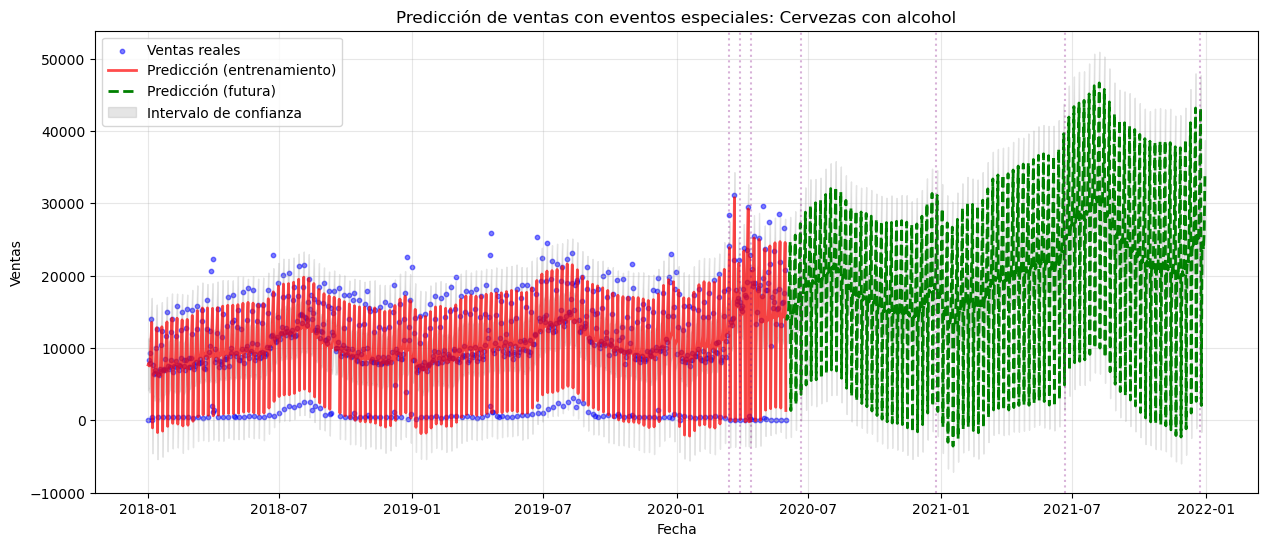

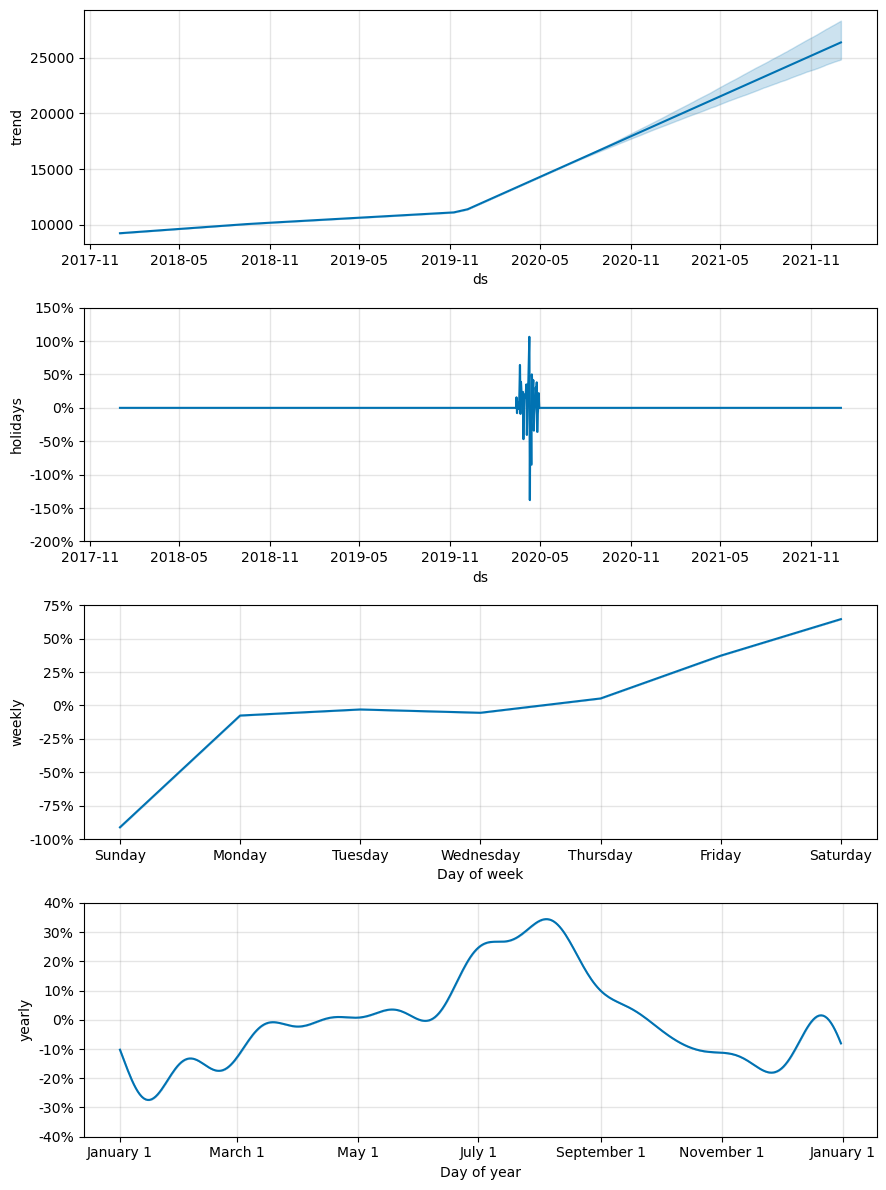

In [64]:
# 5. Visualización
plt.figure(figsize=(15, 6))

# Datos reales
plt.scatter(df_cerveza['ds'], df_cerveza['y'], 
           color='blue', alpha=0.5, s=10, label='Ventas reales')

# Predicción (entrenamiento)
mask_training = forecast['ds'] <= df_cerveza['ds'].max()
plt.plot(forecast['ds'][mask_training], 
         forecast['yhat'][mask_training], 
         color='red', alpha=0.7, linewidth=2, 
         label='Predicción (entrenamiento)')

# Predicción futura
mask_future = forecast['ds'] > df_cerveza['ds'].max()
plt.plot(forecast['ds'][mask_future], 
         forecast['yhat'][mask_future], 
         'g--', linewidth=2, 
         label='Predicción (futura)')

# Intervalo de confianza
plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='gray', alpha=0.2,
                 label='Intervalo de confianza')

plt.title('Predicción de ventas con eventos especiales: Cervezas con alcohol')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True, alpha=0.3)

# Marcar eventos especiales
for _, holiday in holidays.iterrows():
    plt.axvline(x=pd.to_datetime(holiday['ds']), 
                color='purple', linestyle=':', alpha=0.3)

plt.legend()
plt.show()

# 6. Componentes
m_holidays.plot_components(forecast)
plt.show()


In [65]:
# 7. Comparación de métricas
print(f"""
Comparación de predicciones por períodos:

1. Resto de 2020 (post-COVID):
   - Predicción media: {forecast.loc[(forecast['ds'] > ultimo_dato) & (forecast['ds'] <= '2020-12-31'), 'yhat'].mean():.2f}
   - Pico esperado: {forecast.loc[(forecast['ds'] > ultimo_dato) & (forecast['ds'] <= '2020-12-31'), 'yhat'].max():.2f}
   - Valle esperado: {forecast.loc[(forecast['ds'] > ultimo_dato) & (forecast['ds'] <= '2020-12-31'), 'yhat'].min():.2f}

2. Año 2021:
   - Predicción media: {forecast.loc[(forecast['ds'] >= '2021-01-01') & (forecast['ds'] <= '2021-12-31'), 'yhat'].mean():.2f}
   - Pico esperado verano: {forecast.loc[(forecast['ds'] >= '2021-06-01') & (forecast['ds'] <= '2021-08-31'), 'yhat'].max():.2f}
   - Valle esperado invierno: {forecast.loc[(forecast['ds'] >= '2021-01-01') & (forecast['ds'] <= '2021-02-28'), 'yhat'].min():.2f}

3. Efecto de eventos especiales:
   - Impacto medio confinamiento: {forecast.loc[(forecast['ds'] >= '2020-03-14') & (forecast['ds'] <= '2020-03-29'), 'holidays'].mean():.2f}
   - Impacto medio verano: {forecast.loc[(forecast['ds'] >= '2021-06-21') & (forecast['ds'] <= '2021-08-21'), 'holidays'].mean():.2f}
""")


Comparación de predicciones por períodos:

1. Resto de 2020 (post-COVID):
   - Predicción media: 17792.49
   - Pico esperado: 32234.54
   - Valle esperado: -1602.14

2. Año 2021:
   - Predicción media: 22850.78
   - Pico esperado verano: 46636.51
   - Valle esperado invierno: -3576.81

3. Efecto de eventos especiales:
   - Impacto medio confinamiento: 0.11
   - Impacto medio verano: 0.00



In [66]:
print("""
Comparación con el modelo anterior:

1. Problemas detectados:
   - Predicciones negativas (valle esperado: -3576.81), lo cual es imposible para ventas
   - Crecimiento poco realista en 2021 (media de 22850.78 vs 17792.49 en 2020)
   - Impacto de eventos especiales casi nulo (0.11 para confinamiento, 0.0 para verano)

2. Limitaciones del modelo:
   - No respeta el límite inferior natural de 0 para las ventas
   - Sobreestima el crecimiento futuro
   - No captura adecuadamente el impacto de los eventos especiales

3. Posibles Mejoras:
   - Implementar una transformación logarítmica para evitar valores negativos
   - Ajustar los parámetros de los eventos especiales
   - Reducir el intervalo de predicción para mayor precisión

""")


Comparación con el modelo anterior:

1. Problemas detectados:
   - Predicciones negativas (valle esperado: -3576.81), lo cual es imposible para ventas
   - Crecimiento poco realista en 2021 (media de 22850.78 vs 17792.49 en 2020)
   - Impacto de eventos especiales casi nulo (0.11 para confinamiento, 0.0 para verano)

2. Limitaciones del modelo:
   - No respeta el límite inferior natural de 0 para las ventas
   - Sobreestima el crecimiento futuro
   - No captura adecuadamente el impacto de los eventos especiales

3. Posibles Mejoras:
   - Implementar una transformación logarítmica para evitar valores negativos
   - Ajustar los parámetros de los eventos especiales
   - Reducir el intervalo de predicción para mayor precisión




In [67]:
# 1. Preparo los datos con transformación logarítmica
categoria = 'Cervezas con alcohol'
df_cerveza = df_datos_categorias[df_datos_categorias['Categoría'] == categoria].copy()
df_cerveza = df_cerveza[['Fecha', 'Ventas']].rename(columns={'Fecha': 'ds', 'Ventas': 'y'})
df_cerveza['ds'] = pd.to_datetime(df_cerveza['ds'])
df_cerveza['y'] = np.log1p(df_cerveza['y'])  # log1p para manejar valores cercanos a 0

# 2. Defino eventos especiales con parámetros ajustados
holidays = pd.DataFrame([
    # COVID-19
    {
        'holiday': 'Confinamiento_Total',
        'ds': '2020-03-14',
        'lower_window': 0,
        'upper_window': 30,
        'description': 'Confinamiento estricto'
    },
    {
        'holiday': 'Desescalada',
        'ds': '2020-04-13',
        'lower_window': 0,
        'upper_window': 45,
        'description': 'Proceso de desescalada'
    },
    # Eventos estacionales 2020
    {
        'holiday': 'Verano_2020',
        'ds': '2020-07-15',  # Centro del verano
        'lower_window': -30,
        'upper_window': 30,
        'description': 'Pico verano 2020'
    },
    # Eventos estacionales 2021
    {
        'holiday': 'Verano_2021',
        'ds': '2021-07-15',
        'lower_window': -30,
        'upper_window': 30,
        'description': 'Pico verano 2021'
    }
])
holidays

holiday          ds  lower_window  upper_window  \
0  Confinamiento_Total  2020-03-14             0            30   
1          Desescalada  2020-04-13             0            45   
2          Verano_2020  2020-07-15           -30            30   
3          Verano_2021  2021-07-15           -30            30   

              description  
0  Confinamiento estricto  
1  Proceso de desescalada  
2        Pico verano 2020  
3        Pico verano 2021

In [68]:
# 3. Creo modelo mejorado
m_improved = Prophet(
    holidays=holidays,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.001,  # Más restrictivo
    holidays_prior_scale=20,        # Mayor peso a eventos
    seasonality_prior_scale=15      # Mayor peso a estacionalidad
)

# 4. Entreno el modelo
m_improved.fit(df_cerveza)

# 5. Genero predicciones
dias_prediccion = (pd.to_datetime('2021-12-31') - df_cerveza['ds'].max()).days
future = m_improved.make_future_dataframe(periods=dias_prediccion)
forecast = m_improved.predict(future)


00:01:11 - cmdstanpy - INFO - Chain [1] start processing
00:01:12 - cmdstanpy - INFO - Chain [1] done processing
00:01:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:01:12 - cmdstanpy - INFO - Chain [1] start processing
00:01:26 - cmdstanpy - INFO - Chain [1] done processing


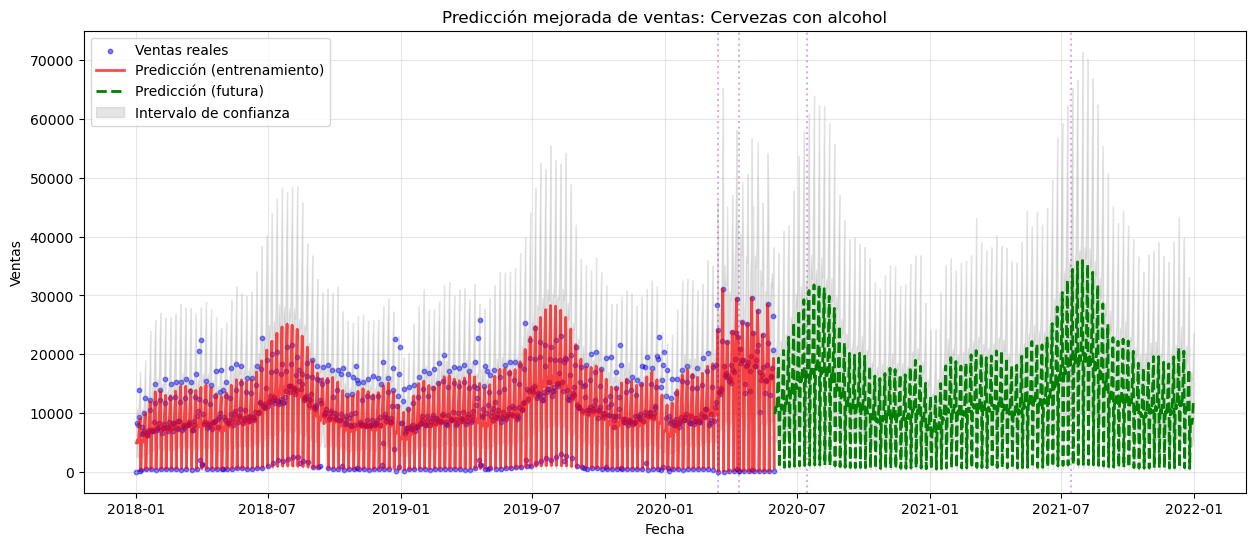

In [69]:
#6. Transformo las predicciones de vuelta a la escala original
forecast['yhat'] = np.expm1(forecast['yhat'])
forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])
df_cerveza['y'] = np.expm1(df_cerveza['y'])

# 7. Visualización mejorada
plt.figure(figsize=(15, 6))
plt.scatter(df_cerveza['ds'], df_cerveza['y'], 
           color='blue', alpha=0.5, s=10, label='Ventas reales')

mask_training = forecast['ds'] <= df_cerveza['ds'].max()
plt.plot(forecast['ds'][mask_training], 
         forecast['yhat'][mask_training], 
         color='red', alpha=0.7, linewidth=2, 
         label='Predicción (entrenamiento)')

mask_future = forecast['ds'] > df_cerveza['ds'].max()
plt.plot(forecast['ds'][mask_future], 
         forecast['yhat'][mask_future], 
         'g--', linewidth=2, 
         label='Predicción (futura)')

plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='gray', alpha=0.2,
                 label='Intervalo de confianza')

plt.title('Predicción mejorada de ventas: Cervezas con alcohol')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True, alpha=0.3)

for _, holiday in holidays.iterrows():
    plt.axvline(x=pd.to_datetime(holiday['ds']), 
                color='purple', linestyle=':', alpha=0.3)

plt.legend()
plt.show()